## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


In [ ]:
(prior.rvs(m)<0.2).std()/m**0.5

0.0039818869898579495

# Diversion 1: Likelihoods

---


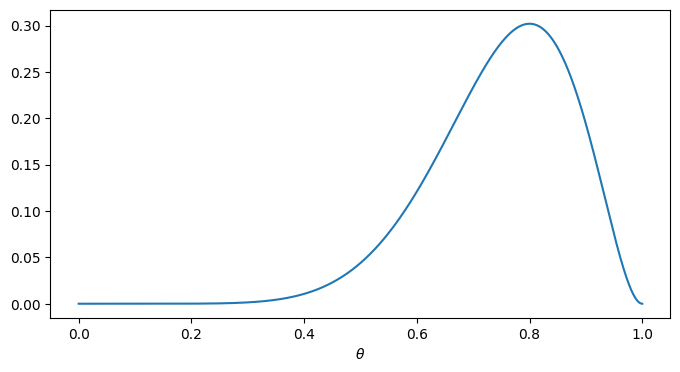

In [ ]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom(n=n,p=theta).pmf(x)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

prior "subjectively" chosen in bayesian inference
- data models are subjective too

-> need posterior to be a distribution

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


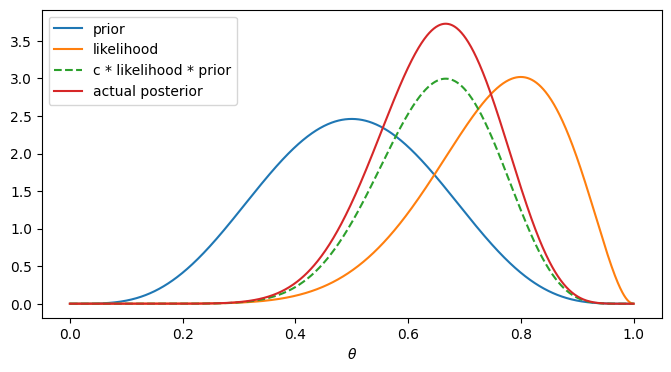

In [ ]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain),
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom(n, p=p).pmf(x)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='likelihood')
plt.plot(parameter_domain,
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain),
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

- orange curve is from above
- blue curve- thought probability is 50/50
- green dash line - legit element y multiplication, is a vector?

$$Beta(x+\alpha, n-x+\beta)$$

swamping data
- likelihood so strong


- neveer gonna fully escape prior
- will still be around the tail of prior

# Probability Questions 2

---

1. Estimate $\Pr(a \leq p \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


Estimated Pr(0.5 <= p <= 0.8 | x): 0.7665


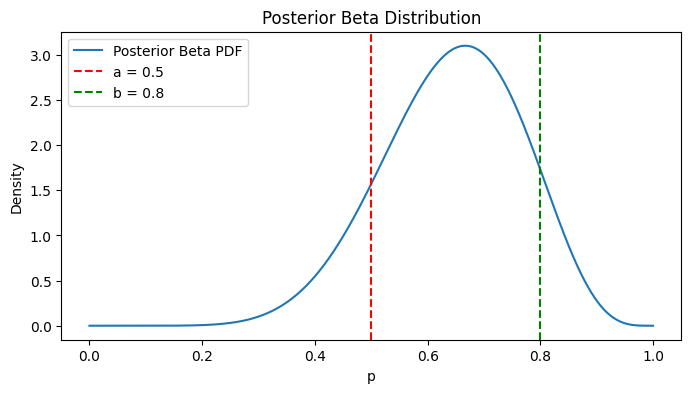

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha, beta = 2, 2  # Prior Beta parameters
n = 10              # Number of trials
x = 7               # Number of successes
a, b = 0.5, 0.8     # Interval of interest
N = 100000          # Number of samples

# Posterior Beta parameters
posterior_alpha = alpha + x
posterior_beta = beta + n - x

# Generate samples from the posterior
samples = stats.beta.rvs(a=posterior_alpha, b=posterior_beta, size=N)

# Estimate the probability
prob_estimate = np.mean((samples >= a) & (samples <= b))
print(f"Estimated Pr({a} <= p <= {b} | x): {prob_estimate:.4f}")

# Plot the posterior distribution
parameter_domain = np.linspace(0, 1, 1000)
posterior_pdf = stats.beta.pdf(parameter_domain, posterior_alpha, posterior_beta)
plt.figure(figsize=(8, 4))
plt.plot(parameter_domain, posterior_pdf, label="Posterior Beta PDF")
plt.axvline(a, color='r', linestyle='--', label=f"a = {a}")
plt.axvline(b, color='g', linestyle='--', label=f"b = {b}")
plt.title("Posterior Beta Distribution")
plt.xlabel("p")
plt.ylabel("Density")
plt.legend()
plt.show()


2. let a be 0 and plug b to produce 95%
- need the inverse cdf function => point percentile function ppf.(.025)

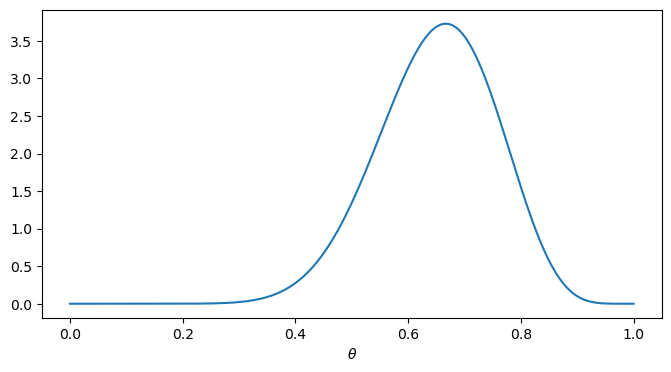

In [ ]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


In [ ]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]


(0.4337071605974434, 0.8361063962515201)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

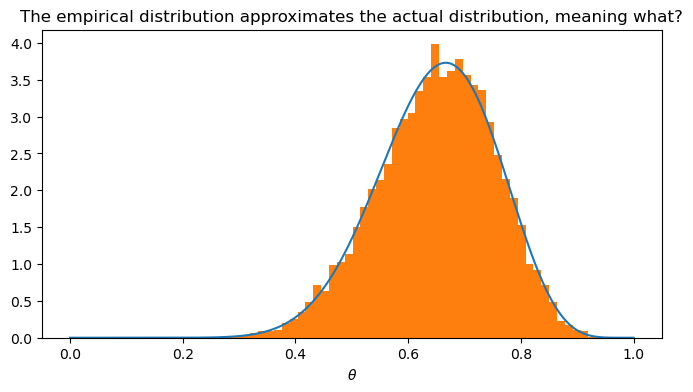

In [ ]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max());

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
- can make sample based probability statements w/o needing the analytical function in the end
- can just sample and make statements
- dk function but can sample  
6. Why might this be useful?
7. How is this different than calculating probabilities?
8. Why is Bayesian inference different from Frequentist inference?
- parameters- random variables - have distribution
- make probability statements
frequentist - confidence of procedure
bayesian - tell what you believe about parameter show distribution 95% of sample etc


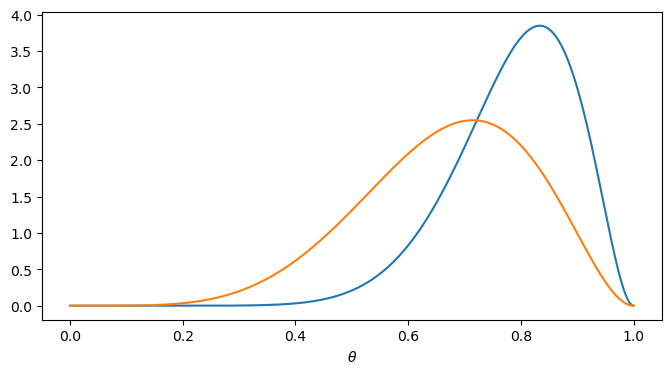

In [ ]:
alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


two samples, driven by theta 1 theta 2,  what is your belief of more sucess of theta 1 (blue)
process 1 or process 2 (orange) which succeeds more
- draw samples from 1 each
- 2 dimensional integral
integral and compare --> monte carlo
calculate prob that 1 < 2

- distribution of ratio - sample of ratios (can do crazy combinations)

9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

# **Question 1**
The task involves updating sequential posterior distributions using a Beta-Binomial model as new observations are made. This process relies on Bayesian principles, where a prior distribution is combined with the likelihood of observed data to compute the posterior.

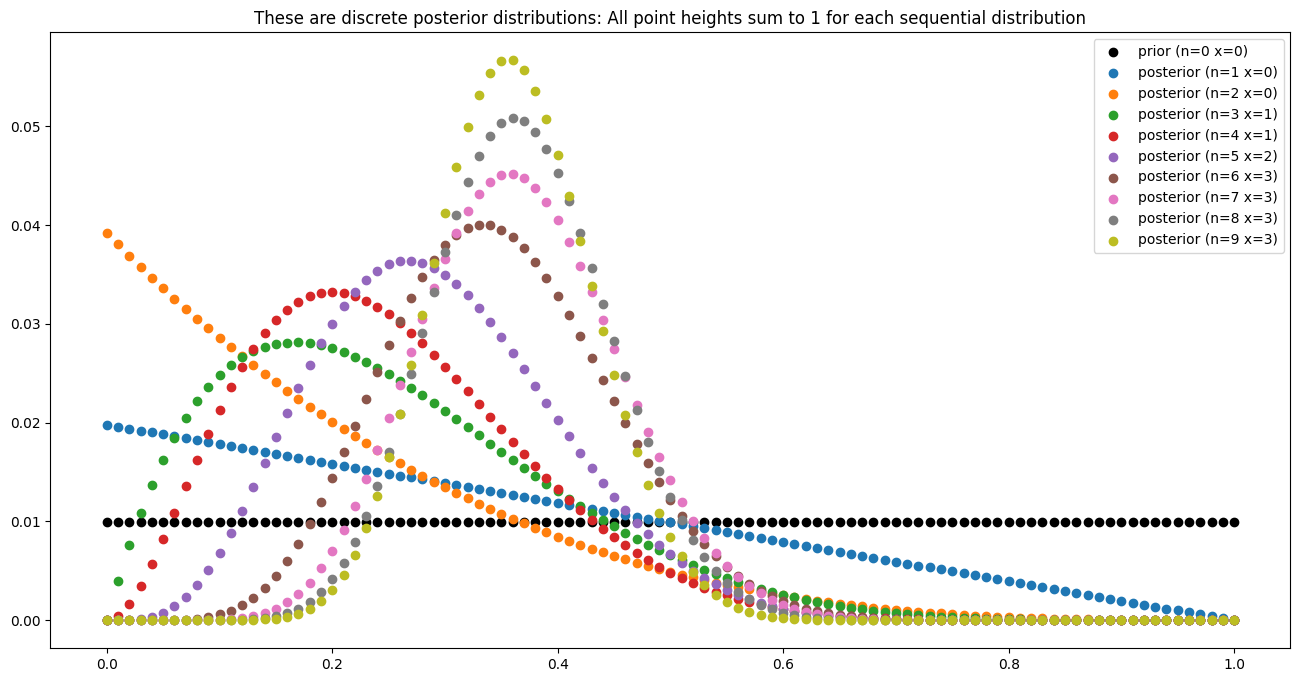

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    # Compute the posterior
    likelihood = parameter_domain**x * (1 - parameter_domain)**(n - x)
    posterior = likelihood * prior  # Unnormalized posterior
    posterior /= posterior.sum()  # Normalize to ensure it sums to 1

    # or do updates in a truly sequential manner using Bernoulli
    prior = posterior  # for each Bernoulli observation update

    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

The prior distribution is uniform, representing no initial preference for any parameter value. As observations are made, the posterior updates based on the observed data, eventually concentrating around the true value of the parameter.

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

# **Question 2**

This problem involves implementing a two-entity Bayesian multi-armed bandit algorithm. The process updates Beta posteriors independently for each entity, decides which arm to pull based on posterior probabilities, and simulates and learns the true success probabilities.

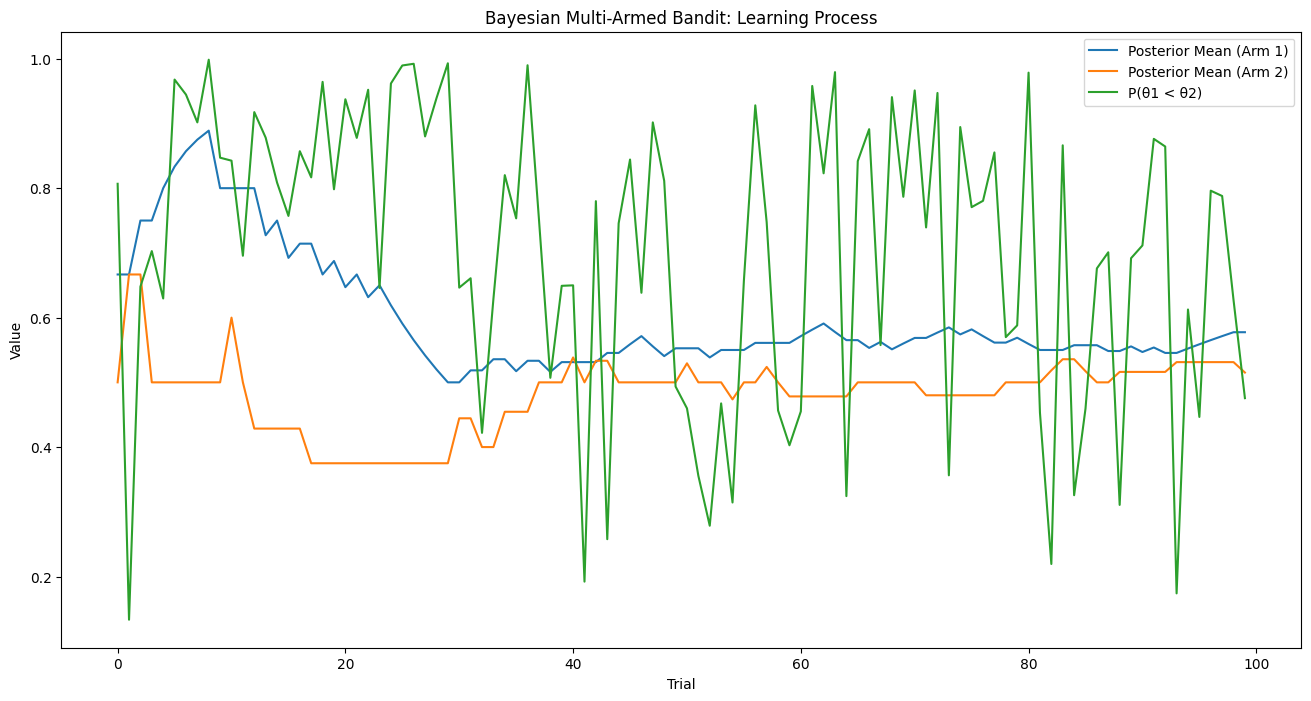

In [1]:
# Q2: Bayesian Multi-Armed Bandit (Two Entities)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True probabilities for two arms
theta_true = [0.6, 0.4]

# Initialization
alpha = [1, 1]
beta_param = [1, 1]
n_trials = 100
n_arms = len(theta_true)

# Tracking results
posterior_means = np.zeros((n_trials, n_arms))
prob_theta1_less_theta2 = np.zeros(n_trials)

# Simulation
for t in range(n_trials):
    # Sample from posteriors
    sampled_theta = [np.random.beta(alpha[i], beta_param[i]) for i in range(n_arms)]

    # Calculate P(θ1 < θ2)
    prob_theta1_less_theta2[t] = beta.cdf(sampled_theta[0], alpha[1], beta_param[1])

    # Select arm to pull (exploration-exploitation)
    chosen_arm = np.argmax(sampled_theta)

    # Simulate outcome
    outcome = np.random.rand() < theta_true[chosen_arm]

    # Update Beta parameters
    alpha[chosen_arm] += outcome
    beta_param[chosen_arm] += 1 - outcome

    # Record posterior means
    posterior_means[t] = [alpha[i] / (alpha[i] + beta_param[i]) for i in range(n_arms)]

# Plotting results
plt.figure(figsize=(16, 8))
plt.plot(range(n_trials), posterior_means[:, 0], label="Posterior Mean (Arm 1)")
plt.plot(range(n_trials), posterior_means[:, 1], label="Posterior Mean (Arm 2)")
plt.plot(range(n_trials), prob_theta1_less_theta2, label="P(θ1 < θ2)")
plt.xlabel("Trial")
plt.ylabel("Value")
plt.title("Bayesian Multi-Armed Bandit: Learning Process")
plt.legend()
plt.show()


This algorithm effectively learns which entity has a higher success probability while balancing exploration and exploitation.

# **Question 3**

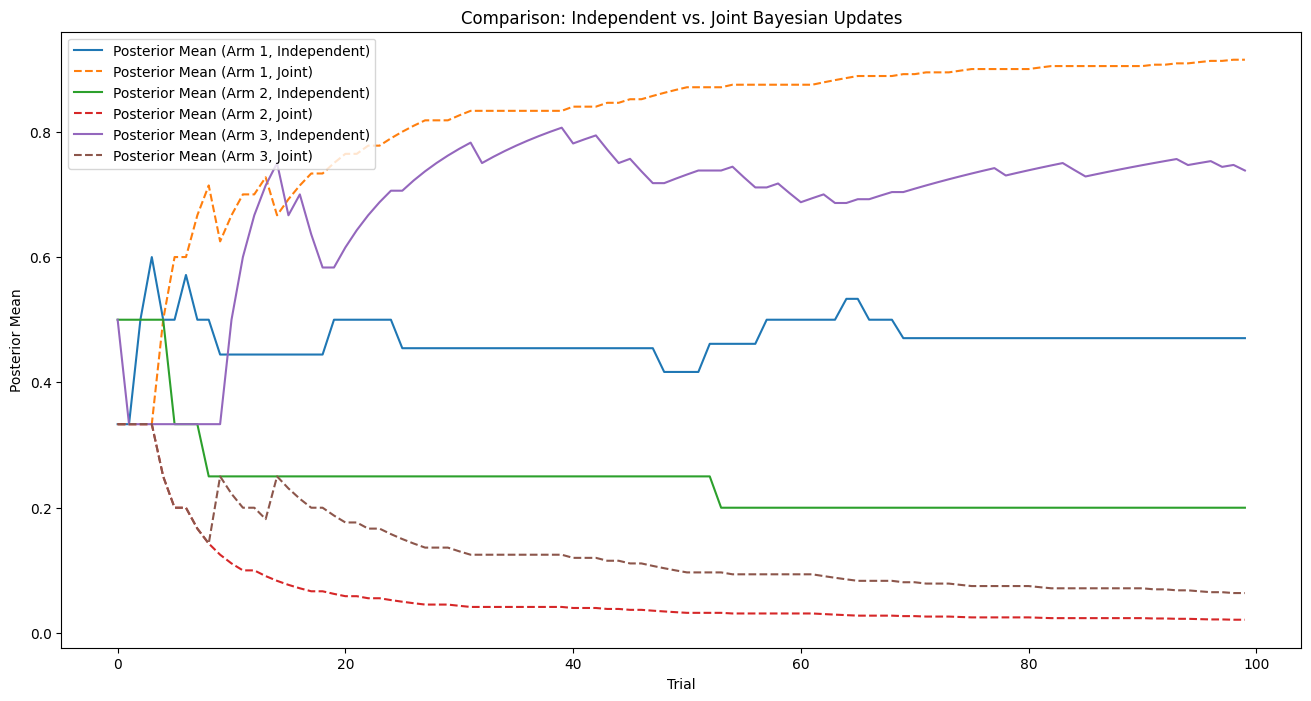

In [3]:
# Q3: Generalization to Three Entities

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True probabilities for three arms
theta_true = [0.5, 0.3, 0.7]

# Independent Beta-Binomial analysis
alpha_indep = [1, 1, 1]
beta_indep = [1, 1, 1]

# Joint Dirichlet-Multinomial analysis
alpha_joint = np.ones(3)

n_trials = 100
n_arms = len(theta_true)
posterior_means_indep = np.zeros((n_trials, n_arms))
posterior_means_joint = np.zeros((n_trials, n_arms))

# Simulation
for t in range(n_trials):
    # Sample from independent posteriors
    sampled_indep = [np.random.beta(alpha_indep[i], beta_indep[i]) for i in range(n_arms)]
    sampled_joint = dirichlet.rvs(alpha_joint, size=1).flatten()

    # Choose arm
    chosen_arm_indep = np.argmax(sampled_indep)
    chosen_arm_joint = np.argmax(sampled_joint)

    # Simulate outcomes
    outcome_indep = np.random.rand() < theta_true[chosen_arm_indep]
    outcome_joint = np.random.rand() < theta_true[chosen_arm_joint]

    # Update Beta parameters
    alpha_indep[chosen_arm_indep] += outcome_indep
    beta_indep[chosen_arm_indep] += 1 - outcome_indep

    # Update Dirichlet parameters
    alpha_joint[chosen_arm_joint] += 1 if outcome_joint else 0

    # Record posterior means
    posterior_means_indep[t] = [alpha_indep[i] / (alpha_indep[i] + beta_indep[i]) for i in range(n_arms)]
    posterior_means_joint[t] = alpha_joint / np.sum(alpha_joint)

# Plotting results
plt.figure(figsize=(16, 8))
for i in range(n_arms):
    plt.plot(range(n_trials), posterior_means_indep[:, i], label=f"Posterior Mean (Arm {i+1}, Independent)")
    plt.plot(range(n_trials), posterior_means_joint[:, i], linestyle='--', label=f"Posterior Mean (Arm {i+1}, Joint)")
plt.xlabel("Trial")
plt.ylabel("Posterior Mean")
plt.title("Comparison: Independent vs. Joint Bayesian Updates")
plt.legend()
plt.show()


**Discussion**

The Dirichlet-Multinomial approach is advantageous when entities share characteristics, while independent Beta-Binomial updates are simpler and more appropriate when entities are unrelated.

**Real-World Application**

Online ad optimization is a practical example, where each ad is an entity with a success probability (click-through rate). This framework balances exploration (showing less-tested ads) and exploitation (showing high-performing ads).